# Moto di una sfera in un fluido denso

## dati:

$\phi_{sfera}=\left(2.20 \pm 0.05 \right)~mm$

$\rho_{sfera}=\left(7800 \pm 5 \right)~\frac{kg}{m^3}$

$g=9.81~\frac{m}{s^2}$

$\rho_{sapone \; piatti}$=rhoSapone

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv

<video controls src="video/esperimento.mp4" width="360" height="270" />

In [3]:
rhoSapone=(157/150) #g/cm^3
print(rhoSapone)

1.0466666666666666


Il sapone è "praticamente" acqua

Carico i dati sperimentali del video

In [4]:
tsper = []
vsper = []
k = 0
with open('dati.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    first = True
    for riga in csv_reader:
        if first:
            first = False
            continue
        tsper.append(riga["t"])
        vsper.append(riga["v"])
tsper = np.array(tsper, dtype=np.float64)
vsper = np.array(vsper, dtype=np.float64)

prima traccia

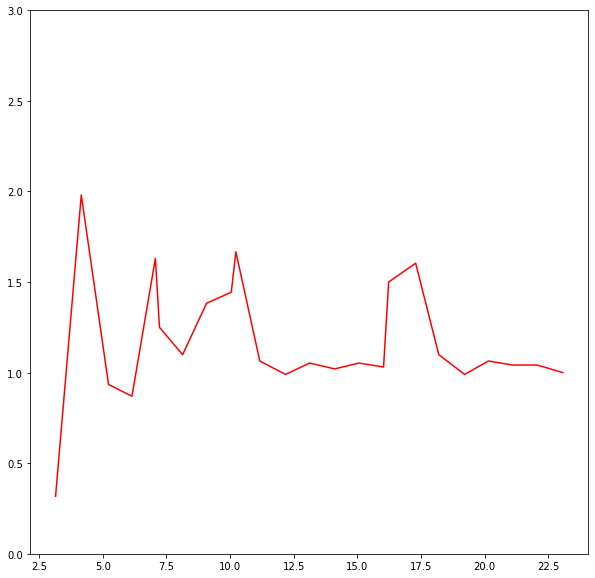

In [8]:
plt.figure(figsize=(10,10))
plt.ylim(ymax = 3, ymin = 0)
plt.plot(tsper, vsper, 'r-')
plt.show()

Dati per simulazione:
la velocità limite si può stimare in
$$v_{limite}=\left( 1.0 \pm 0.2 \right) \frac{cm}{s}$$


In [9]:
vL=1.0 #cm/s

utilizziamo la condizione $F=0$, cioè 
$$ mg-F_A=bv_{limite}$$

In [10]:
R=(2.2*10**(-1))/2 #cm
rhoSfera=7.859 #g/cm^3
g=981 #cm/s^2

In [11]:
VolumeSfera=(4/3)*np.pi*R**3 #cm^3
MassaSfera=VolumeSfera*rhoSfera #g
print(VolumeSfera) #cm^3
print(MassaSfera) #g
PesoNelFluido=VolumeSfera*g*(rhoSfera-rhoSapone) 
print(PesoNelFluido) 

0.005575279762570688
0.043816123654043033
37.25903155000388


In [12]:
b=PesoNelFluido/(vL)
print(b)

37.25903155000388


$\Delta t$ intervello di tempo di analisi

$x(t)$ posizione della pallina nell'istante $t$
$F=mg-Vg-bv$ $b$ dipende dal fluido

$x(0) \leftarrow h$

$v(0) \leftarrow 0$

$F(0) \leftarrow mg-V \rho_{fluido} g$

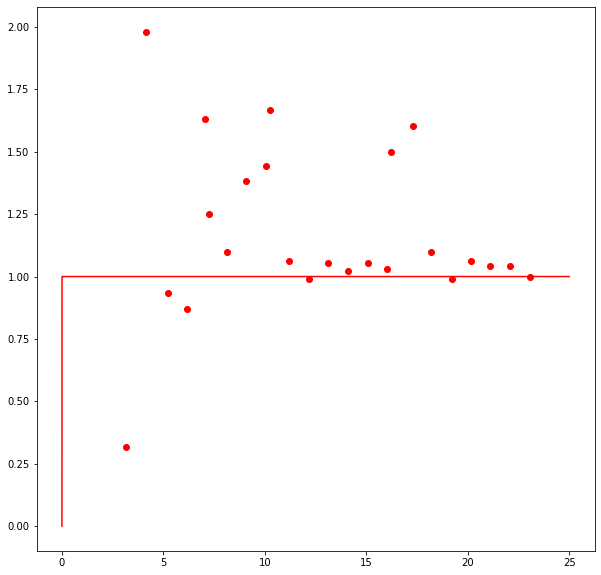

In [13]:
h=25 #cm
x=h
v=0
dt=0.001 #s
t=0.0
tOsservazione=25 #s
a=PesoNelFluido/MassaSfera
posizione = []
velocita = []
tempo = []
while t<tOsservazione and x>0:
    posizione.append(x)
    velocita.append(v)
    x=x-v*dt
    v=v+a*dt
    a=(PesoNelFluido-b*v)/MassaSfera
    tempo.append(t)
    t=t+dt
posizione = np.array(posizione, dtype=np.float64)
velocita = np.array(velocita, dtype=np.float64)
tempo = np.array(tempo, dtype=np.float64)
plt.figure(figsize=(10,10))
plt.plot(tempo, velocita, 'r-',tsper, vsper, 'ro')
#plt.plot(tempo, posizione, 'b-', label='line 2')
plt.show()

Speriamo che i dati dei ragazzi che hanno occhi più buoni dei miei siano più buoni, anche se questi non sono proprio male!